In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Load MNIST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

# Build and train the model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))

# Save the model
model.save("mnist_cnn_model.h5")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 35ms/step - accuracy: 0.9130 - loss: 0.2888 - val_accuracy: 0.9841 - val_loss: 0.0468
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9856 - loss: 0.0442 - val_accuracy: 0.9869 - val_loss: 0.0368
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 34ms/step - accuracy: 0.9907 - loss: 0.0283 - val_accuracy: 0.9898 - val_loss: 0.0290


Saving 25_dna.png to 25_dna (1).png
Uploaded image: 25_dna (1).png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


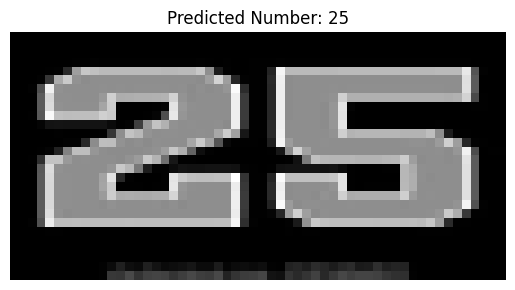

✅ Predicted digits: 2, 5


In [3]:
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import files

# Step 1: Upload an image file

uploaded = files.upload()
img_path = list(uploaded.keys())[0]
print("Uploaded image:", img_path)


# Step 2: Load trained MNIST model

model = load_model("mnist_cnn_model.h5")


#  Step 3: Load and preprocess the image
# Load image in RGB

img = Image.open(img_path).convert("RGB")


# Convert to NumPy and grayscale by emphasizing dark strokes

img_np = np.array(img)
gray = 255 - np.max(img_np, axis=2)

# Resize to 56x28 → assume two digits side by side
gray = cv2.resize(gray, (56, 28), interpolation=cv2.INTER_AREA)

# Normalize to 0–1
gray = gray / 255.0


#  Step 4: Split into two 28×28 digits

digit1 = gray[:, :28].reshape(1, 28, 28, 1)
digit2 = gray[:, 28:].reshape(1, 28, 28, 1)


#  Step 5: Predict both digits

pred1 = np.argmax(model.predict(digit1))
pred2 = np.argmax(model.predict(digit2))


#  Step 6: Display the result

plt.imshow(gray, cmap="gray")
plt.title(f"Predicted Number: {pred1}{pred2}")
plt.axis("off")
plt.show()

print(f"✅ Predicted digits: {pred1}, {pred2}")


Saving 1_22_333_dna.png to 1_22_333_dna.png
Uploaded image: 1_22_333_dna.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
✅ Predicted Digits: 122333


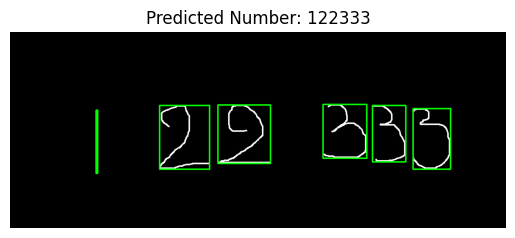

In [4]:

# 🔹 Multi-digit Recognition (MNIST-trained model)


from tensorflow.keras.models import load_model
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import files


# 1️ Upload your image

uploaded = files.upload()  # Opens file picker in Colab
img_path = list(uploaded.keys())[0]
print("Uploaded image:", img_path)


# 2️ Load trained CNN model

model = load_model("mnist_cnn_model.h5")

# 3️ Load and preprocess image

img = Image.open(img_path).convert("L")


img = ImageOps.invert(img)
img_np = np.array(img)


_, thresh = cv2.threshold(img_np, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=lambda c: cv2.boundingRect(c)[0])  # sort left to right


# 4️ Preprocessing helper

def preprocess_digit(cropped):
    """Centers and resizes a digit image into 28x28 like MNIST."""
    h, w = cropped.shape
    if h < 3 or w < 3:
        return None


    if h > w:
        new_h = 20
        new_w = max(1, int(w * (20.0 / h)))
    else:
        new_w = 20
        new_h = max(1, int(h * (20.0 / w)))

    resized = cv2.resize(cropped, (new_w, new_h))


    canvas = np.zeros((28, 28), dtype=np.uint8)
    x_offset = (28 - new_w) // 2
    y_offset = (28 - new_h) // 2
    canvas[y_offset:y_offset+new_h, x_offset:x_offset+new_w] = resized


    canvas = canvas.astype("float32") / 255.0
    return canvas.reshape(1, 28, 28, 1)


# 5️ Predict digits

predicted_digits = []
boxed = cv2.cvtColor(thresh, cv2.COLOR_GRAY2BGR)

for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    if w * h < 50:  # Skip noise
        continue

    digit = thresh[y:y+h, x:x+w]
    processed = preprocess_digit(digit)
    if processed is None:
        continue


    pred = np.argmax(model.predict(processed))
    predicted_digits.append(str(pred))


    cv2.rectangle(boxed, (x, y), (x+w, y+h), (0, 255, 0), 2)


# 6️ Display results

predicted_number = ''.join(predicted_digits)
print("✅ Predicted Digits:", predicted_number)

plt.imshow(boxed)
plt.title(f"Predicted Number: {predicted_number}")
plt.axis("off")
plt.show()


Saving 2_1_3_dna.png to 2_1_3_dna.png

Processing: 2_1_3_dna.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted Digits: 213


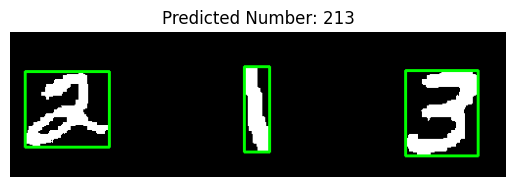

In [8]:
# 1️⃣ Upload your image(s)
from google.colab import files
uploaded = files.upload()  # Opens file picker in Colab

# 2️⃣ Import libraries
import cv2
import numpy as np
from PIL import Image, ImageOps
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# 3️⃣ Load your trained MNIST CNN model
model = load_model("mnist_cnn_model.h5")

# 4️⃣ Function to preprocess each cropped digit into MNIST format
def preprocess_digit(cropped):
    h, w = cropped.shape
    if h < 3 or w < 3:
        return None

    # Resize while keeping aspect ratio
    if h > w:
        new_h = 20
        new_w = max(1, int(w * (20.0 / h)))
    else:
        new_w = 20
        new_h = max(1, int(h * (20.0 / w)))

    resized = cv2.resize(cropped, (new_w, new_h))

    # Center into 28x28
    canvas = np.zeros((28, 28), dtype=np.uint8)
    x_offset = (28 - new_w) // 2
    y_offset = (28 - new_h) // 2
    canvas[y_offset:y_offset+new_h, x_offset:x_offset+new_w] = resized

    # Normalize
    canvas = canvas.astype("float32") / 255.0
    return canvas.reshape(1, 28, 28, 1)

# 5️⃣ Process each uploaded image
for img_path in uploaded.keys():
    print("\nProcessing:", img_path)

    # Step 1: Read + convert to grayscale + invert colors
    img = Image.open(img_path).convert("L")
    img = ImageOps.invert(img)
    img_np = np.array(img)

    # Step 2: Thresholding (make background black, digits white)
    _, thresh = cv2.threshold(img_np, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Step 3: Find contours (digits)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=lambda c: cv2.boundingRect(c)[0])

    # Step 4: Predict each contour region
    predicted_digits = []
    boxed = cv2.cvtColor(thresh, cv2.COLOR_GRAY2BGR)

    for c in contours:
        x, y, w, h = cv2.boundingRect(c)
        if w * h < 50:
            continue  # skip tiny noise

        digit = thresh[y:y+h, x:x+w]
        processed = preprocess_digit(digit)
        if processed is None:
            continue

        pred = np.argmax(model.predict(processed))
        predicted_digits.append(str(pred))
        cv2.rectangle(boxed, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Step 5: Show prediction
    predicted_number = ''.join(predicted_digits)
    print("Predicted Digits:", predicted_number)

    plt.imshow(boxed)
    plt.title(f"Predicted Number: {predicted_number}")
    plt.axis("off")
    plt.show()
